In [1]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
num_classes = 10
im_rows= 32
im_cols= 32
in_shape = (im_rows, im_cols, 3)

In [3]:
#데이터 읽어 들이기
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
#데이터를 1차원 배열로 변환하기
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

#레이블 데이터를 One-hot 형식으로 변환하기
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
#모델 정의하기
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [6]:
#모델 컴파일하기
model.compile(
loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])

In [7]:
#학습하기
hist = model.fit(X_train, y_train,
                batch_size = 32, epochs = 50,
                verbose = 1,
                validation_data =(X_test, y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 290s 6ms/step - loss: 1.4148 - accuracy: 0.4887 - val_loss: 1.0931 - val_accuracy: 0.6147
Epoch 2/50
50000/50000 [==============================] - 293s 6ms/step - loss: 1.0789 - accuracy: 0.6182 - val_loss: 0.9923 - val_accuracy: 0.6562
Epoch 3/50
50000/50000 [==============================] - 322s 6ms/step - loss: 0.9369 - accuracy: 0.6697 - val_loss: 0.8991 - val_accuracy: 0.6874
Epoch 4/50
50000/50000 [==============================] - 320s 6ms/step - loss: 0.8325 - accuracy: 0.7087 - val_loss: 0.9279 - val_accuracy: 0.6760
Epoch 5/50
50000/50000 [==============================] - 322s 6ms/step - loss: 0.7492 - accuracy: 0.7363 - val_loss: 0.8763 - val_accuracy: 0.6987
Epoch 6/50
50000/50000 [==============================] - 321s 6ms/step - loss: 0.6777 - accuracy: 0.7635 - val_loss: 0.8504 - val_accuracy: 0.7118
Epoch 7/50
50000/50000 [==============================] - 323

In [8]:
#모델 평가하기
score = model.evaluate(X_test, y_test, verbose = 1)
print('정답률 = ', score[1], 'loss = ', score[0])

10000/10000 [==============================] - 13s 1ms/step
정답률 =  0.7107999920845032 loss =  1.3502690464019775


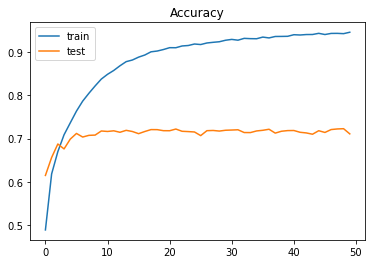

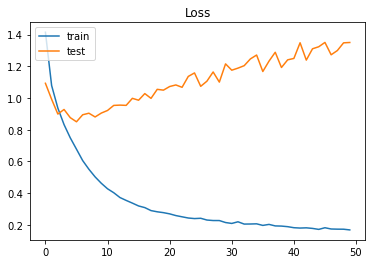

In [9]:
#학습 상태를 그래프로 그리기
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [10]:
#학습결과 저장하기
model.save_weights('cifar10_CNN-weight.h5')

In [11]:
#학습결과 불러오기
model.load_weights('cifar10_CNN-weight.h5')